In [6]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import glob

In [40]:
mysource='4FGL J1806.8+6949'
allfiles=glob.glob('dataAll/data*')
dfall=pd.DataFrame()
for i in range(1,len(allfiles)+1):
    fluxfiles='dataAll/data{}/flux.txt'.format(i)
    df=pd.read_csv(fluxfiles,sep="\s+",header=None)
    dfall=pd.concat([dfall,df],ignore_index=True)

dfall.columns=["flux","fluxErr","TS"]

In [41]:
df=pd.read_csv("TessInfo_3C371_MET.txt",sep=" ", header=[0])
df.head()

,Tstart,Tstop,NormExcessVar,Err_NormExcessVar,Tstart_MET,Tstop_MET
0,58682.8531,58709.7031,0.004944,0.000092,585174513,587494353
1,58710.8642,58735.1114,0.004585,0.000097,587594672,589689630
2,58738.1517,58761.5683,0.004292,0.000096,589952312,591975506
3,58764.1836,58786.5267,0.003515,0.000085,592201468,594131912
4,58790.1558,58813.1044,0.001182,0.000055,594445466,596428225


In [42]:
dfall["TstartMJD"]=df["Tstart"].values
dfall["TstopMJD"]=df["Tstop"].values
dfall.to_csv("fluxInfo{}.txt".format(mysource),sep=" ", header=True, index=False)

In [43]:
df=pd.read_csv("fluxInfo4FGL J1806.8+6949.txt",sep="\s+",header=[0])
df.head()

,flux,fluxErr,TS,TstartMJD,TstopMJD
0,5.364405e-09,2.756239e-09,135.930880,58682.8531,58709.7031
1,7.247472e-09,3.074439e-09,141.370618,58710.8642,58735.1114
2,7.017380e-09,3.146745e-09,116.298758,58738.1517,58761.5683
3,4.303063e-09,2.949058e-09,138.554202,58764.1836,58786.5267
4,1.622548e-08,3.677854e-09,180.238355,58790.1558,58813.1044


In [44]:
Tmidlist=(df["TstartMJD"]+df["TstopMJD"])/2

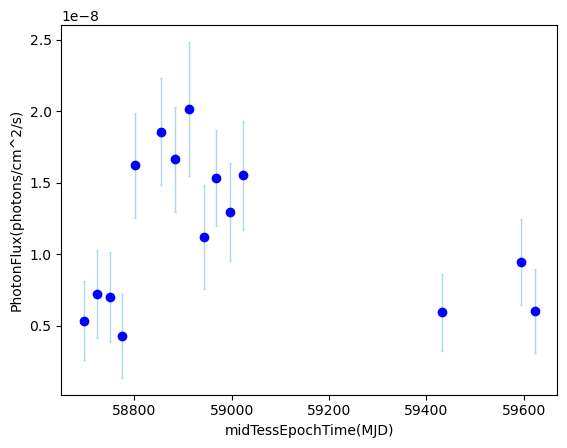

In [49]:
plt.errorbar(Tmidlist,df['flux'], yerr=df['fluxErr'], fmt ='o',color='blue', ecolor='lightblue', elinewidth=1, capsize=1)
plt.xlabel("midTessEpochTime(MJD)")
plt.ylabel("PhotonFlux(photons/cm^2/s)")
plt.show()

In [55]:
dfTess=pd.read_csv("../../../MyWork/TessInfo_3C371.txt",header=[0],sep="\s+")
dfTess=dfTess.drop([5,13],axis=0) #to remove the 30 min and 10 min cadance to have similar cadance excess variance

This is the correlation plot, how the varibility is correlated with flux for source 3C371

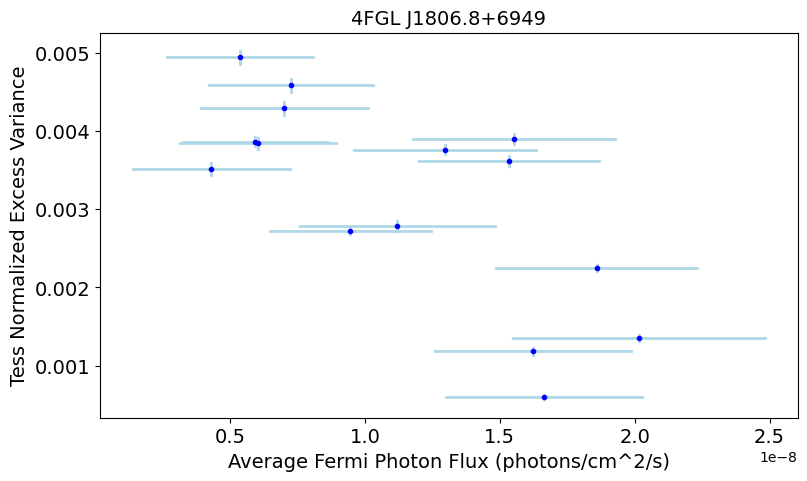

In [59]:
fig, axs = plt.subplots(nrows=1, ncols=1, constrained_layout=False,figsize=(9, 5))
axs.tick_params(axis='both', which='major', labelsize=14)
axs.tick_params(axis='both', which='minor', labelsize=14)
axs.set_title('{}'.format(mysource), fontsize=14)

axs.errorbar(df['flux'], dfTess["NormExcessVar"], xerr=df['fluxErr'], yerr=dfTess["Err_NormExcessVar"],fmt = ".", color='blue', ecolor='lightblue', elinewidth=2, capsize=1)


axs.set_xlabel('Average Fermi Photon Flux (photons/cm^2/s)',fontsize=14)
axs.set_ylabel('Tess Normalized Excess Variance',fontsize=14)
#axs.semilogy()
#plt.savefig('plots/source_{}.png'.format(i))
plt.show()
        